In [9]:
# importing all required libraries
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore') 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report  

pd.set_option('display.max_column',None)

Load the DataSet

In [10]:
df_lead = pd.read_csv('Lead Scoring Assignment\Leads.csv')

In [11]:
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
df_lead.shape

(9240, 37)

In [13]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
df_lead.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


##### Exploratory Data Analysis (EDA)

##### Data Cleaning !

1. Handling the SELECT cell as because the customer didn't select any statement, 

    So, Changing the SELECT values to NULL so that we can see all null values together.

In [15]:
df_lead[df_lead == 'Select'] = np.NaN

In [19]:
count = df_lead.isnull().sum()
percen = count / len(df_lead) * 100

count.sort_values(ascending = False)
percen.sort_values(ascending = False)

df_null = pd.DataFrame({
    'column name' : df_lead.columns,
    'total count' : count,
    'percentage' : percen
})

df_null.reset_index(drop = True, inplace = True)
df_null_sorted = df_null.sort_values(by='percentage', ascending=False)
df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
df_filtered

,column name,total count,percentage
13,How did you hear about X Education,7250,78.463203
28,Lead Profile,6855,74.188312
25,Lead Quality,4767,51.590909
33,Asymmetrique Profile Score,4218,45.649351
32,Asymmetrique Activity Score,4218,45.649351
30,Asymmetrique Activity Index,4218,45.649351
31,Asymmetrique Profile Index,4218,45.649351
29,City,3669,39.707792
12,Specialization,3380,36.580087
24,Tags,3353,36.287879


In [20]:
drop_col = df_null.loc[df_null['percentage'] > 40.00, 'column name']
df_lead.drop(columns = drop_col, inplace = True)

In [21]:
count = df_lead.isnull().sum()
percen = count / len(df_lead) * 100

count.sort_values(ascending = False)
percen.sort_values(ascending = False)

df_null = pd.DataFrame({
    'column name' : df_lead.columns,
    'total count' : count,
    'percentage' : percen
})

df_null.reset_index(drop = True, inplace = True)
df_null_sorted = df_null.sort_values(by='percentage', ascending=False)
df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
df_filtered

,column name,total count,percentage
26,City,3669,39.707792
12,Specialization,3380,36.580087
23,Tags,3353,36.287879
14,What matters most to you in choosing a course,2709,29.318182
13,What is your current occupation,2690,29.112554
11,Country,2461,26.634199
9,Page Views Per Visit,137,1.482684
7,TotalVisits,137,1.482684
10,Last Activity,103,1.114719
3,Lead Source,36,0.389610


Checking the Null values to fill or to impute it.
    
- City               39%
- Specialization     36%

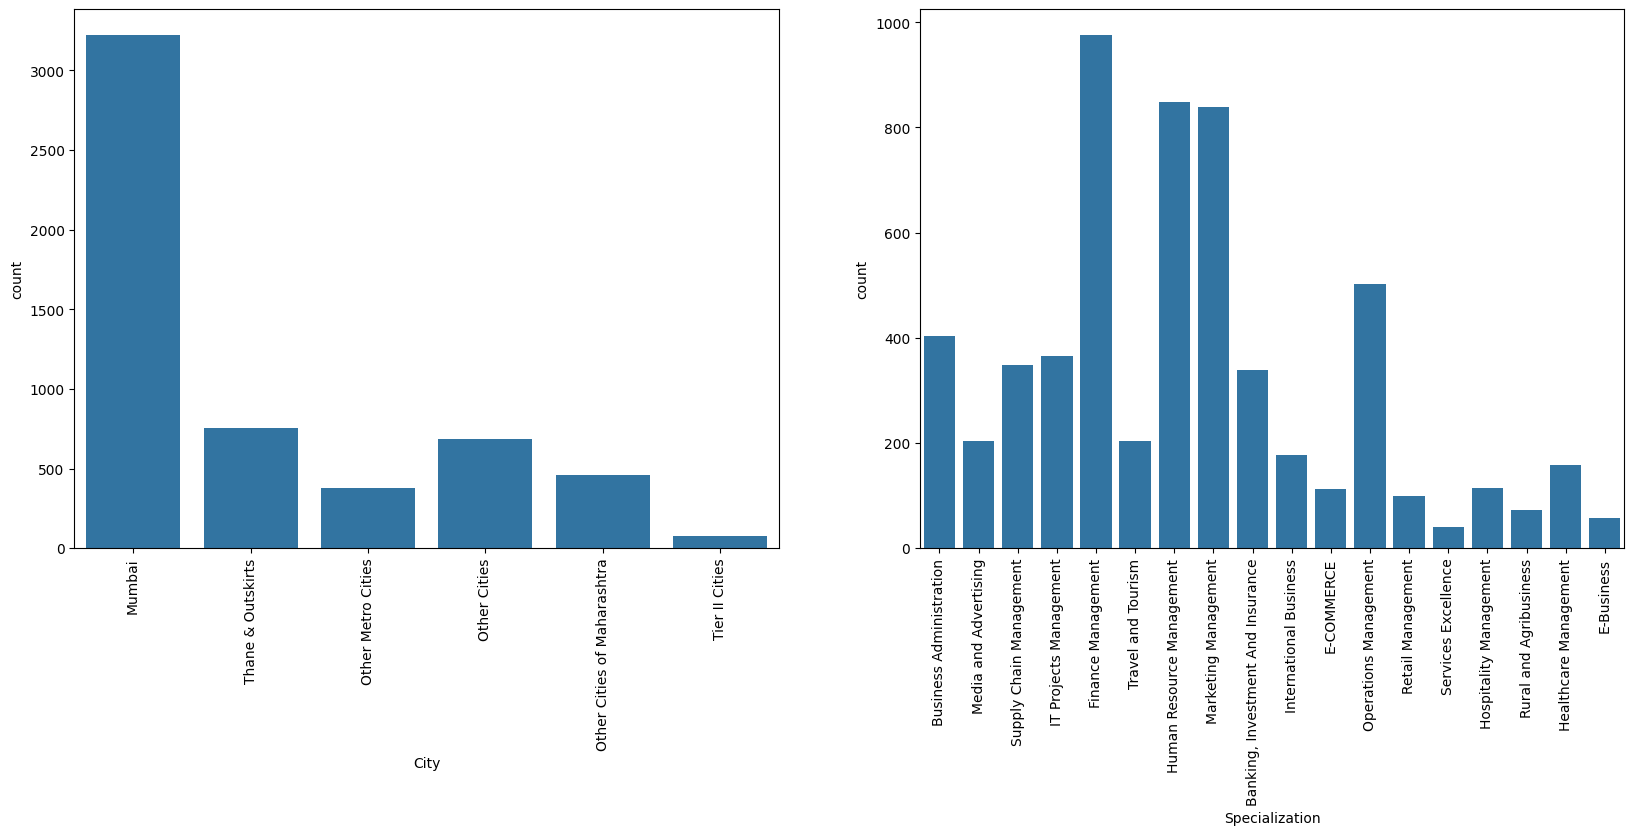

In [22]:
plt.figure(figsize = [20, 7])
plt.subplot(1, 2, 1)
sns.countplot(data = df_lead, x = 'City')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
sns.countplot(data = df_lead, x = 'Specialization')
plt.xticks(rotation = 90)
plt.show()

In [27]:
round(df_lead['City'].value_counts(normalize=True),2) * 100

City
Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: proportion, dtype: float64

In [28]:
round(df_lead['Specialization'].value_counts(normalize=True),2)*100

Specialization
Finance Management                   17.0
Human Resource Management            14.0
Marketing Management                 14.0
Operations Management                 9.0
Business Administration               7.0
IT Projects Management                6.0
Supply Chain Management               6.0
Banking, Investment And Insurance     6.0
Travel and Tourism                    3.0
Media and Advertising                 3.0
International Business                3.0
Healthcare Management                 3.0
Hospitality Management                2.0
E-COMMERCE                            2.0
Retail Management                     2.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   1.0
Name: proportion, dtype: float64

As City has some NaN values and most of the data in city is Mumbai So can impute by `mumbai`

Another the Specialization can be others.

Whenever we fill NaN values we assumne but in Specialization we have equal values, so impute by `Others`

In [29]:
df_lead['City'] = df_lead['City'].replace(np.nan, 'Mumbai')
df_lead['Specialization'] = df_lead['Specialization'].replace(np.nan, 'Others')

Checking the Null values to fill or to impute it.
    
- Tags                                               36%
- What matters most to you in choosing a course	     29%

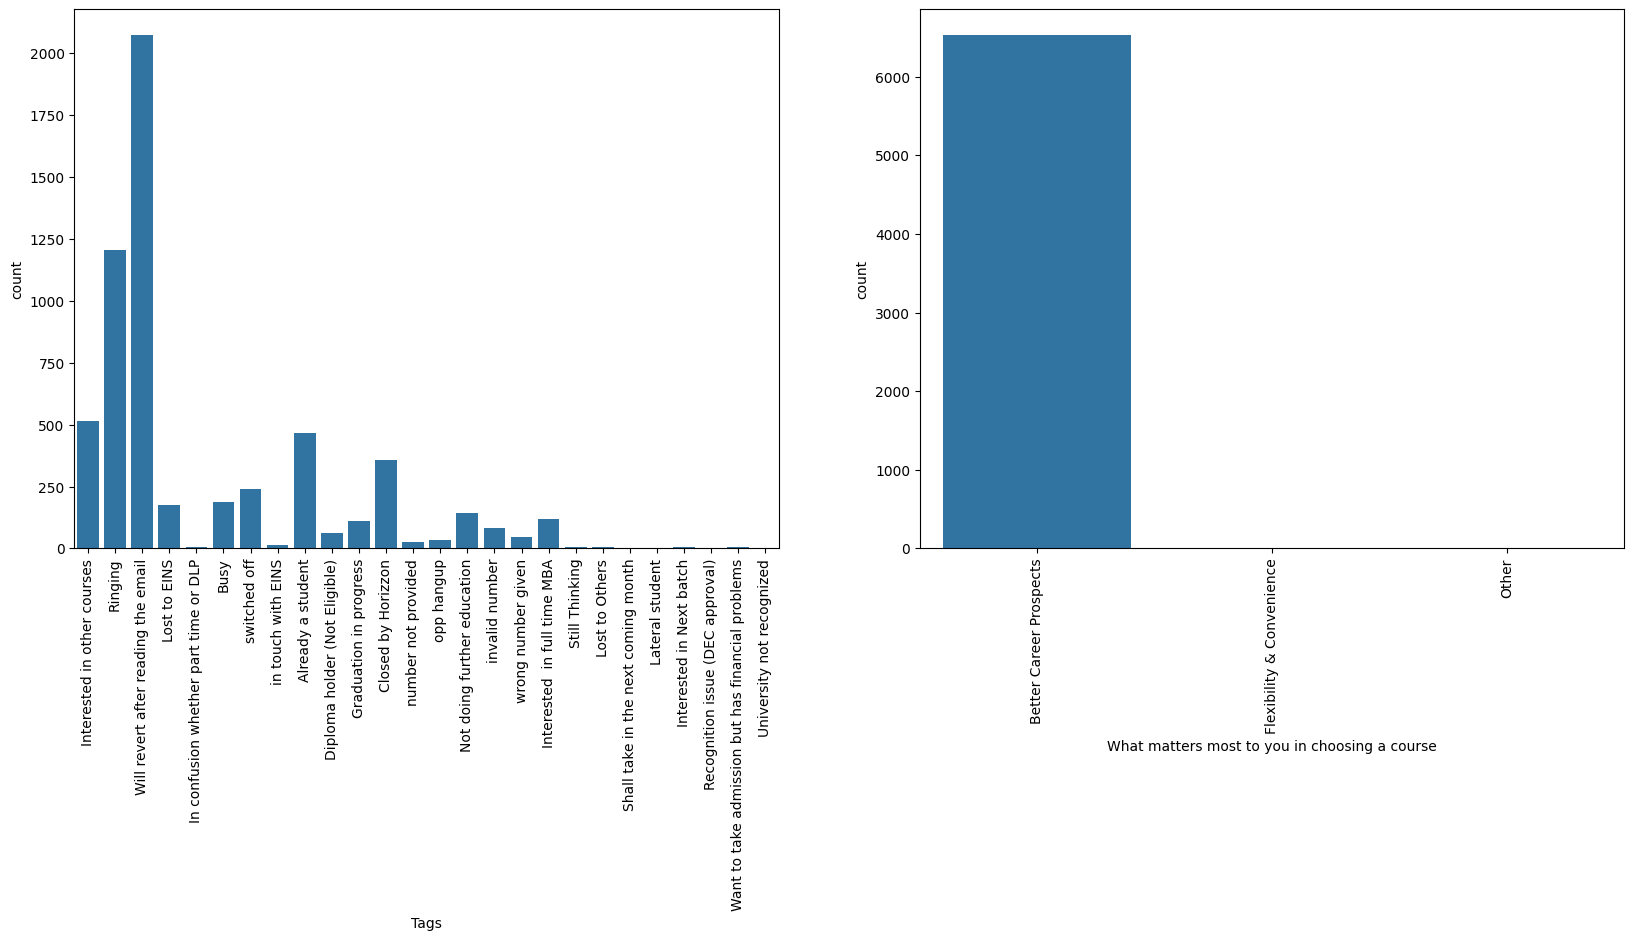

In [30]:
plt.figure(figsize = [20, 7])
plt.subplot(1, 2, 1)
sns.countplot(data = df_lead, x = 'Tags')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
sns.countplot(data = df_lead, x = 'What matters most to you in choosing a course')
plt.xticks(rotation = 90)
plt.show()

In [31]:
round(df_lead['Tags'].value_counts(normalize=True),2) * 100

Tags
Will revert after reading the email                  35.0
Ringing                                              20.0
Interested in other courses                           9.0
Already a student                                     8.0
Closed by Horizzon                                    6.0
switched off                                          4.0
Busy                                                  3.0
Lost to EINS                                          3.0
Not doing further education                           2.0
Interested  in full time MBA                          2.0
Graduation in progress                                2.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            1.0
number not provided                                   0.0
in touch with EINS                                    0.0
Lost to O

In [32]:
round(df_lead['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

What matters most to you in choosing a course
Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: proportion, dtype: float64

As '`Tags`' has some NaN values and most of the data in city is Mumbai So can impute by  '`Will revert after reading the email`'
    
Another the '`What matters most to you in choosing a course`'.
        
Whenever we fill NaN values we check the visual but here the value are same, so drop it.

In [33]:
df_lead['Tags'] = df_lead['Tags'].replace(np.nan, 'Will revert after reading the email')
df_lead.drop('What matters most to you in choosing a course', inplace = True, axis = 1)

Checking the Null values to fill or to impute it.
    
- What is your current occupation    29%
- Country                      	     26%

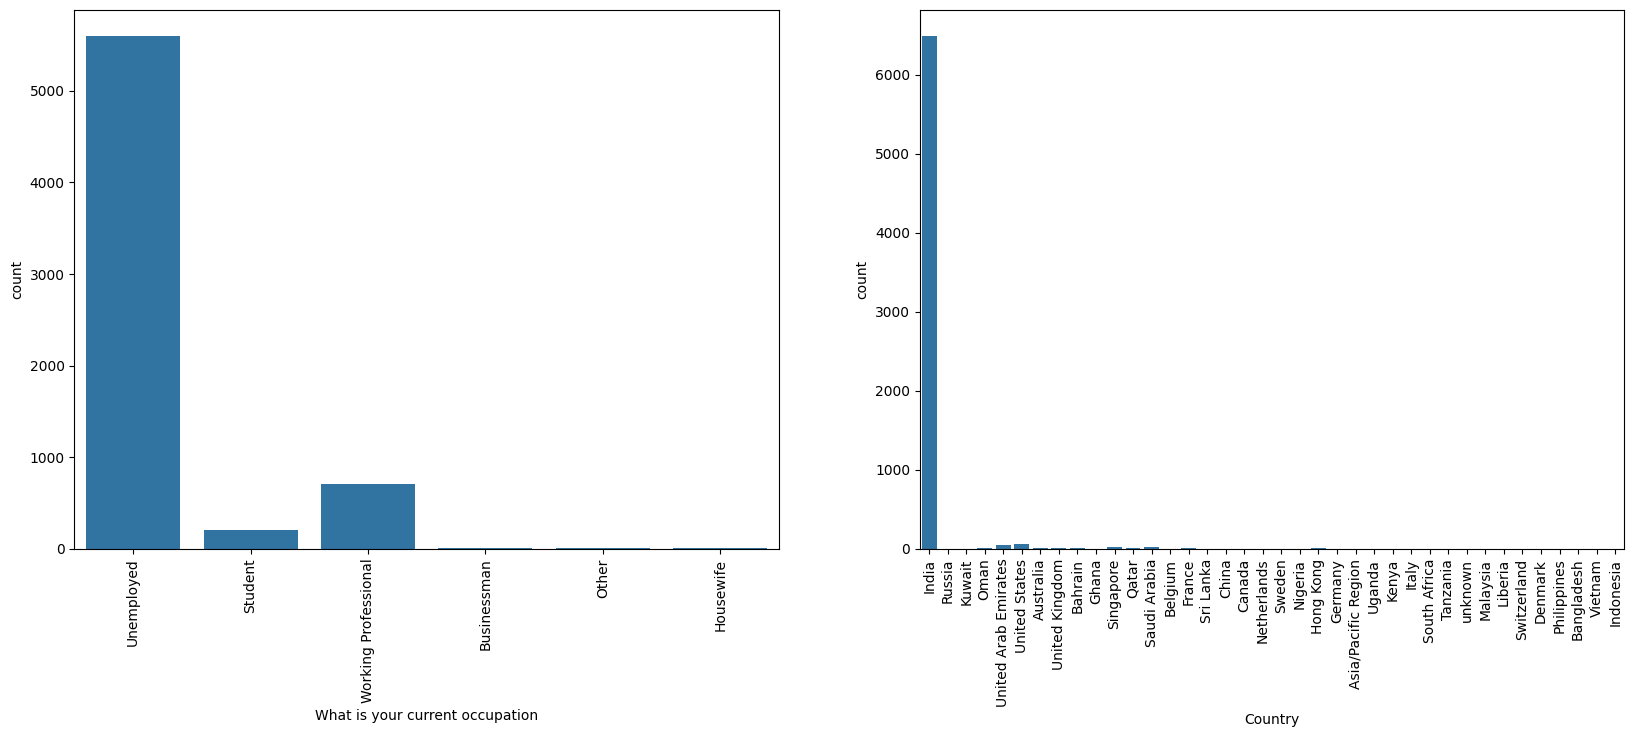

In [34]:
plt.figure(figsize = [20, 7])
plt.subplot(1, 2, 1)
sns.countplot(data = df_lead, x = 'What is your current occupation')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
sns.countplot(data = df_lead, x = 'Country')
plt.xticks(rotation = 90)
plt.show()

In [35]:
round(df_lead['What is your current occupation'].value_counts(normalize=True),2) * 100

What is your current occupation
Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: proportion, dtype: float64

In [36]:
round(df_lead['Country'].value_counts(normalize=True),2) * 100

Country
India                   96.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malays

As 'What is your current occupation' has some NaN values and most of the data is 'Unemployed' So can impute by '`Unemployed`'

Another in Country we have to fill NaN values by the '`India`' as it may be important to us.

In [37]:
df_lead['What is your current occupation'] = df_lead['What is your current occupation'].replace(np.nan, 'Unemployed')
df_lead['Country'] = df_lead['Country'].replace(np.nan, 'India')

At Last there are some columns which are less then 2% NULL values and maybe it be useful for us so imputing or dropping the values here.

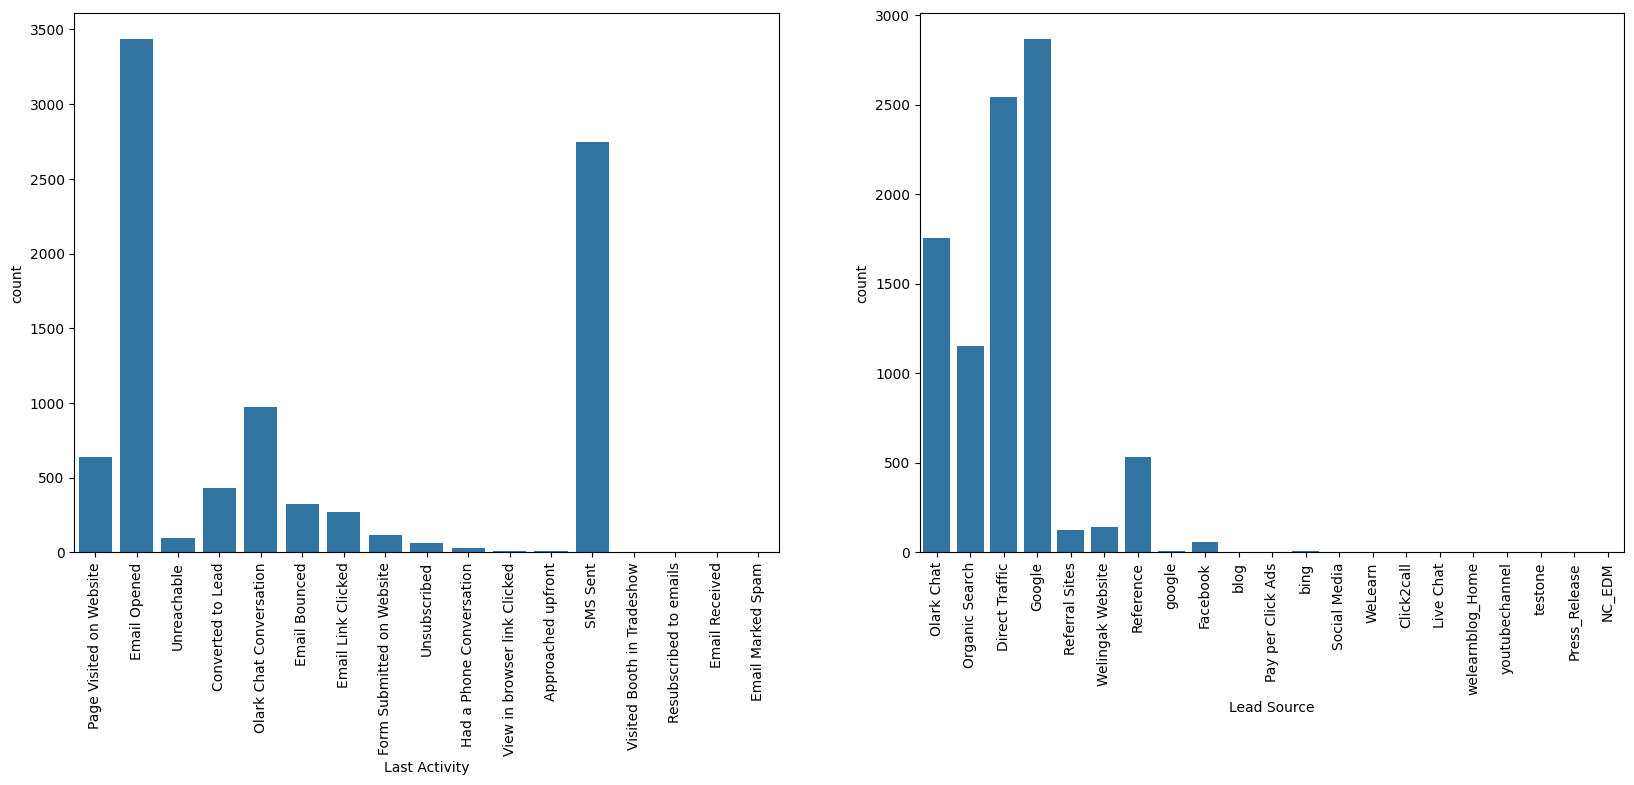

In [40]:
plt.figure(figsize = [20, 7])
plt.subplot(1, 2, 1)
sns.countplot(data = df_lead, x = 'Last Activity')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
sns.countplot(data = df_lead, x = 'Lead Source')
plt.xticks(rotation = 90)
plt.show()

In [56]:
round(df_lead['Page Views Per Visit'].value_counts(normalize=True),2) * 100

Page Views Per Visit
0.00    24.0
2.00    20.0
3.00    13.0
4.00    10.0
1.00     7.0
        ... 
3.43     0.0
2.56     0.0
6.33     0.0
1.64     0.0
2.08     0.0
Name: proportion, Length: 114, dtype: float64

In [55]:
round(df_lead['TotalVisits'].value_counts(normalize=True),2) * 100

TotalVisits
0.0      24.0
2.0      18.0
3.0      14.0
4.0      12.0
5.0       9.0
6.0       5.0
1.0       4.0
7.0       3.0
8.0       2.0
9.0       2.0
10.0      1.0
11.0      1.0
13.0      1.0
12.0      0.0
14.0      0.0
16.0      0.0
15.0      0.0
17.0      0.0
18.0      0.0
20.0      0.0
19.0      0.0
21.0      0.0
23.0      0.0
24.0      0.0
25.0      0.0
27.0      0.0
22.0      0.0
29.0      0.0
28.0      0.0
26.0      0.0
141.0     0.0
55.0      0.0
30.0      0.0
43.0      0.0
74.0      0.0
41.0      0.0
54.0      0.0
115.0     0.0
251.0     0.0
32.0      0.0
42.0      0.0
Name: proportion, dtype: float64

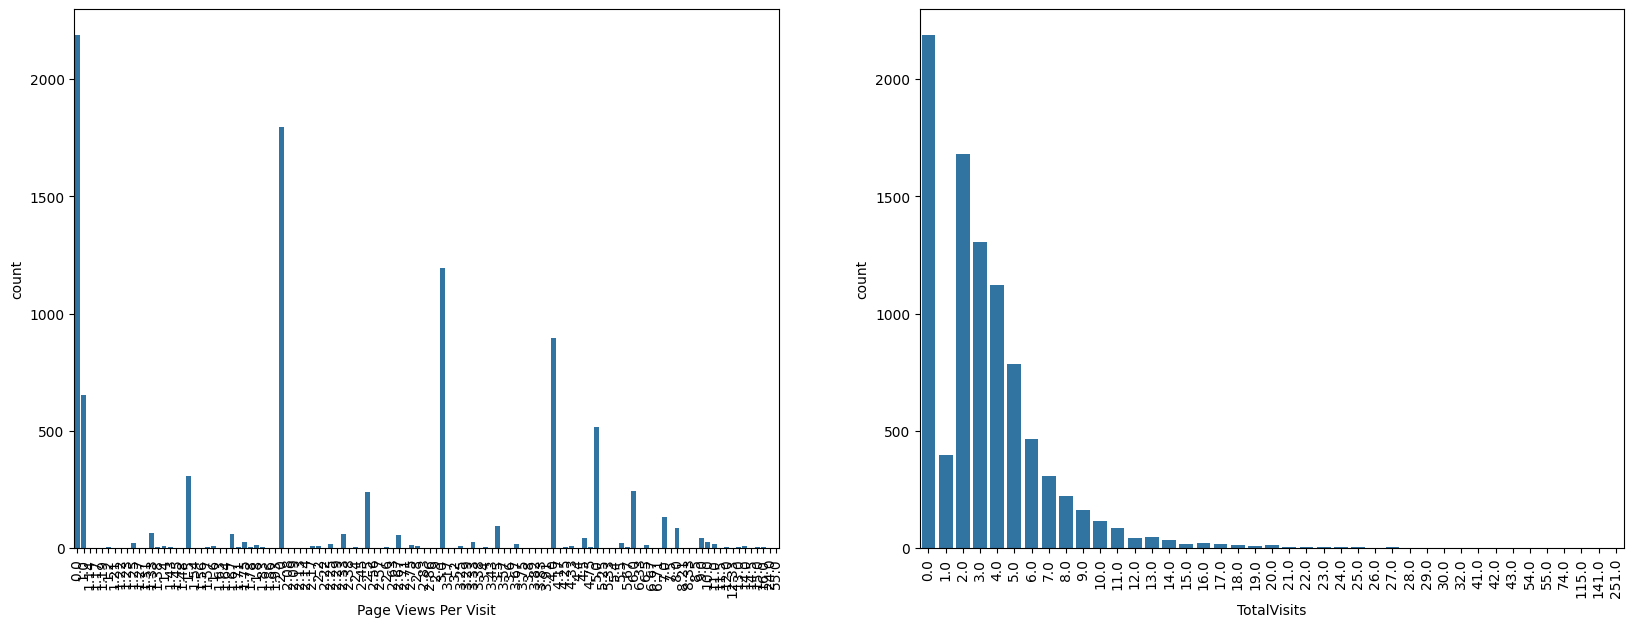

In [57]:
plt.figure(figsize = [20, 7])
plt.subplot(1, 2, 1)
sns.countplot(data = df_lead, x = 'Page Views Per Visit')
plt.xticks(rotation = 90)
plt.subplot(1, 2, 2)
sns.countplot(data = df_lead, x = 'TotalVisits')
plt.xticks(rotation = 90)
plt.show()

In [58]:
df_lead['Last Activity'] = df_lead['Last Activity'].replace(np.nan, 'Email Opened')
df_lead['Lead Source'] = df_lead['Lead Source'].replace(np.nan, 'Google')
df_lead['Page Views Per Visit'] = df_lead['Page Views Per Visit'].replace(np.nan, '0.0')
df_lead['TotalVisits'] = df_lead['TotalVisits'].replace(np.nan, '0.0')

In [60]:
count = df_lead.isnull().sum()
percen = count / len(df_lead) * 100

count.sort_values(ascending = False)
percen.sort_values(ascending = False)

df_null = pd.DataFrame({
    'column name' : df_lead.columns,
    'total count' : count,
    'percentage' : percen
})

df_null.reset_index(drop = True, inplace = True)
df_null_sorted = df_null.sort_values(by='percentage', ascending=False)
df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
df_filtered

,column name,total count,percentage


In [61]:
df_lead.duplicated().sum()

0

Now it maybe cleaned now we can do analysis on basis of our work.

##### EDA - Univariate and Bivarite Analysis.

In [62]:
df_lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [63]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Prospect ID                               9240 non-null   object
 1   Lead Number                               9240 non-null   int64 
 2   Lead Origin                               9240 non-null   object
 3   Lead Source                               9240 non-null   object
 4   Do Not Email                              9240 non-null   object
 5   Do Not Call                               9240 non-null   object
 6   Converted                                 9240 non-null   int64 
 7   TotalVisits                               9240 non-null   object
 8   Total Time Spent on Website               9240 non-null   int64 
 9   Page Views Per Visit                      9240 non-null   object
 10  Last Activity                             9240 n

Converted - As converted is our target variable and we have to get values by the help of other columns and features.

In [66]:
for col in df_lead.columns :
    if df_lead[col].dtype == object:
        print(df_lead[col].value_counts())
        print(50*'_')
        print()

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
__________________________________________________

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
__________________________________________________

Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites  

A Function for Categorical values to get Data

In [103]:
def plot_categorical_distributions(column) :
    activity_counts = df_lead[column].value_counts()

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)    # Bar Plot Helps to create some bar to represent the data value
    sns.barplot(
        x = activity_counts.index, 
        y = activity_counts.values, 
        palette = 'viridis'
    )
    plt.title(f'Bar Chart of {column}')
    plt.xticks(rotation = 45)

    plt.subplot(1, 2, 2)    # Pie Chart Helps to create some bar to represent the data value
    plt.pie(
        activity_counts, 
        labels = activity_counts.index, 
        autopct = '%1.1f%%', 
        colors = sns.color_palette('viridis', len(activity_counts)))
    plt.title(f'Pie Chart of {column}')
    plt.tight_layout()
    plt.show()

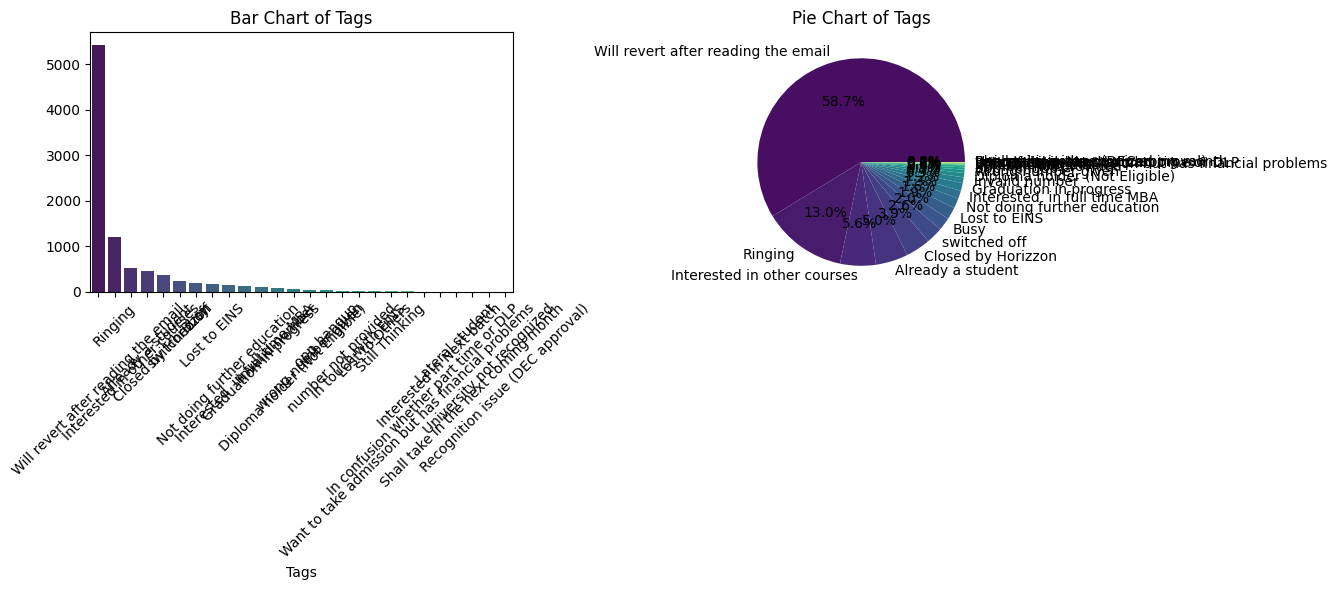

In [104]:
plot_categorical_distributions('Tags')

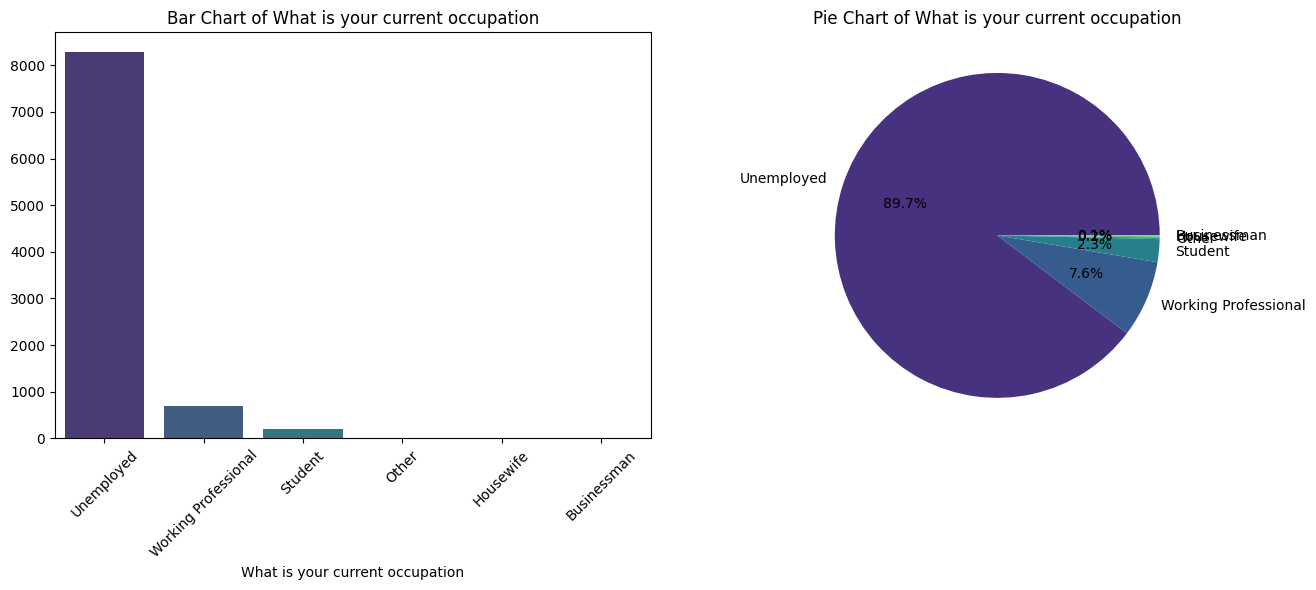

In [105]:
plot_categorical_distributions('What is your current occupation')

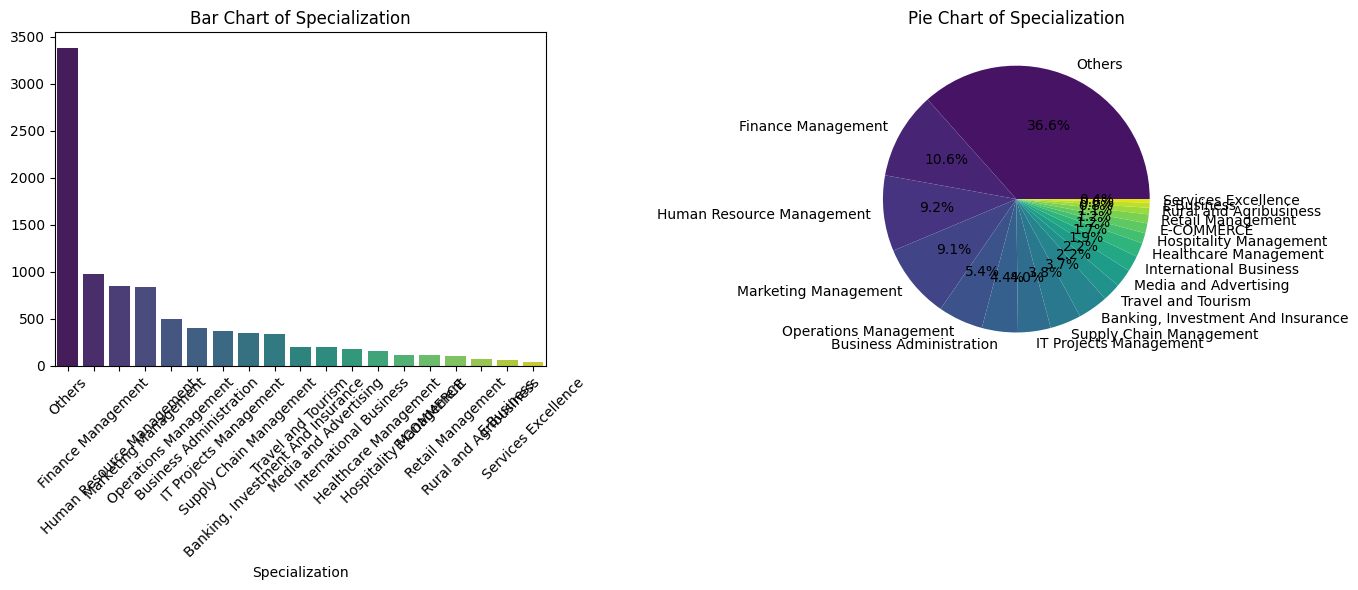

In [106]:
plot_categorical_distributions('Specialization')

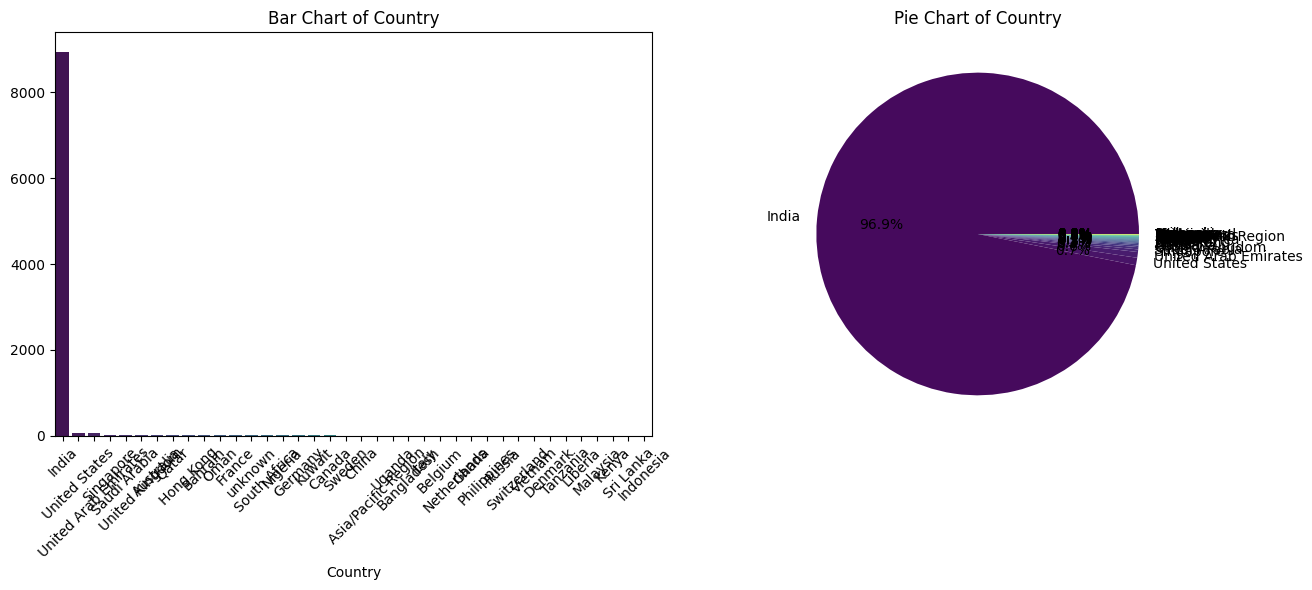

In [107]:
plot_categorical_distributions('Country')

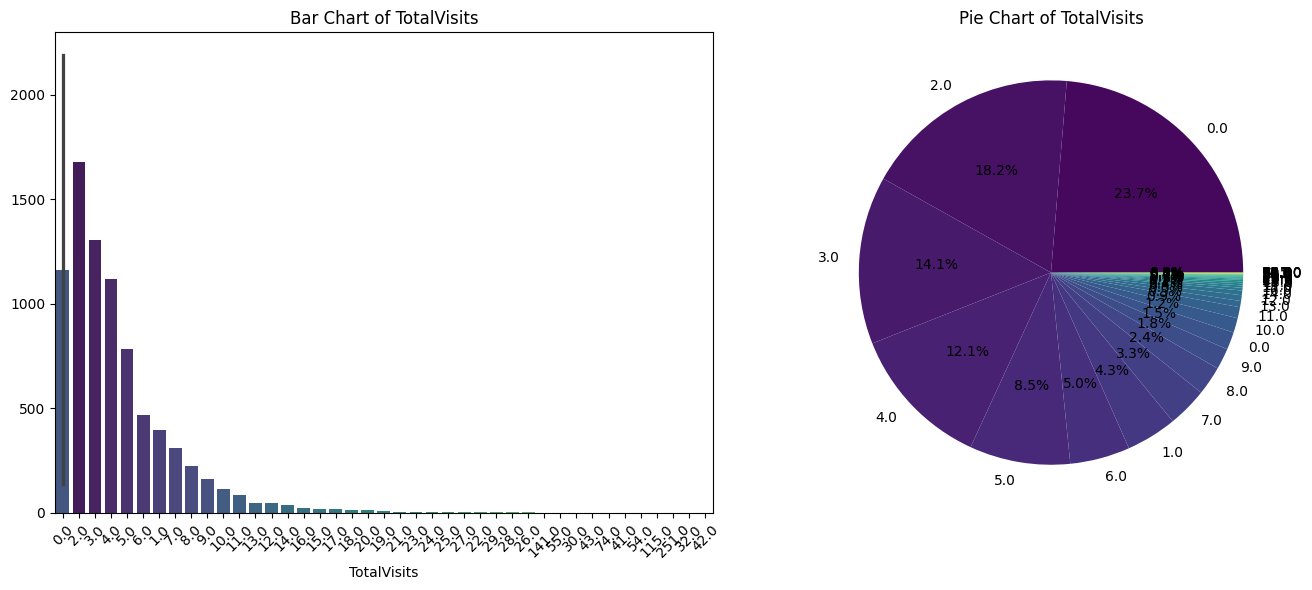

In [108]:
plot_categorical_distributions('TotalVisits')

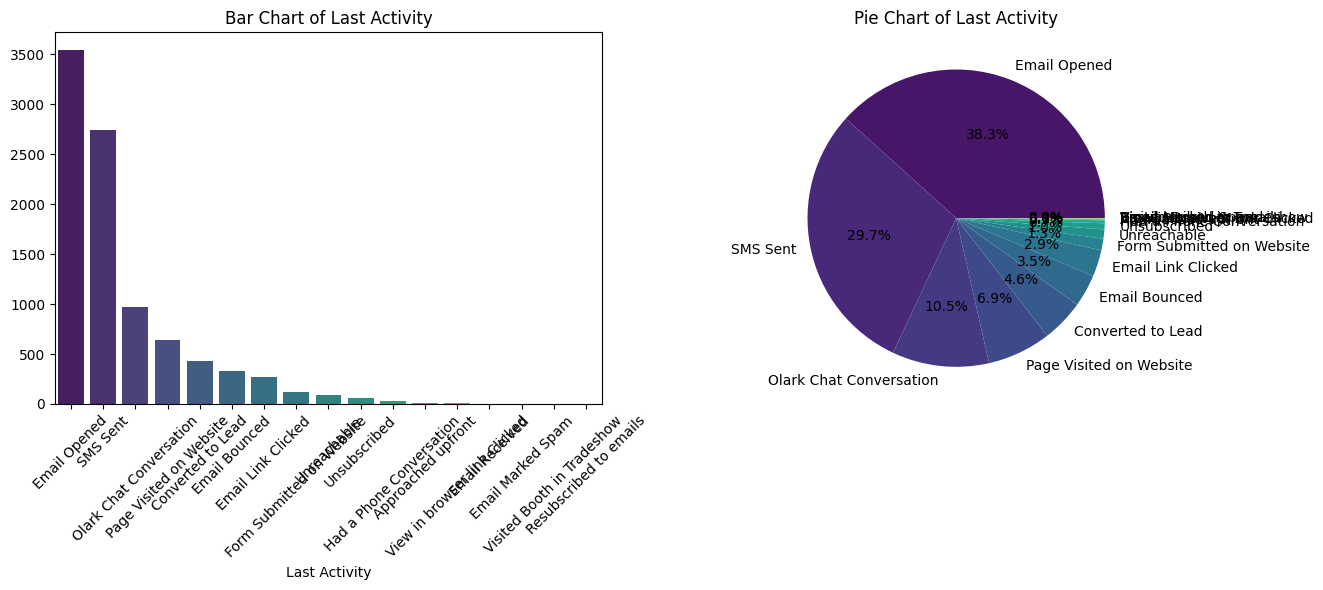

In [110]:
plot_categorical_distributions('Last Activity')

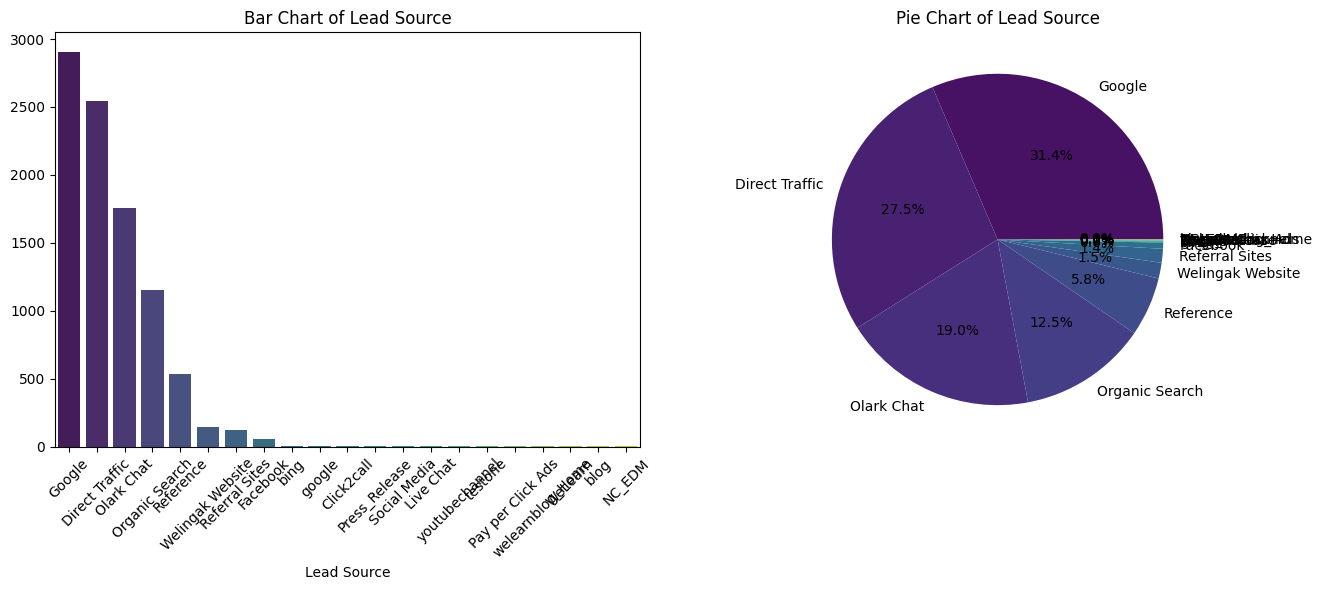

In [111]:
plot_categorical_distributions('Lead Source')

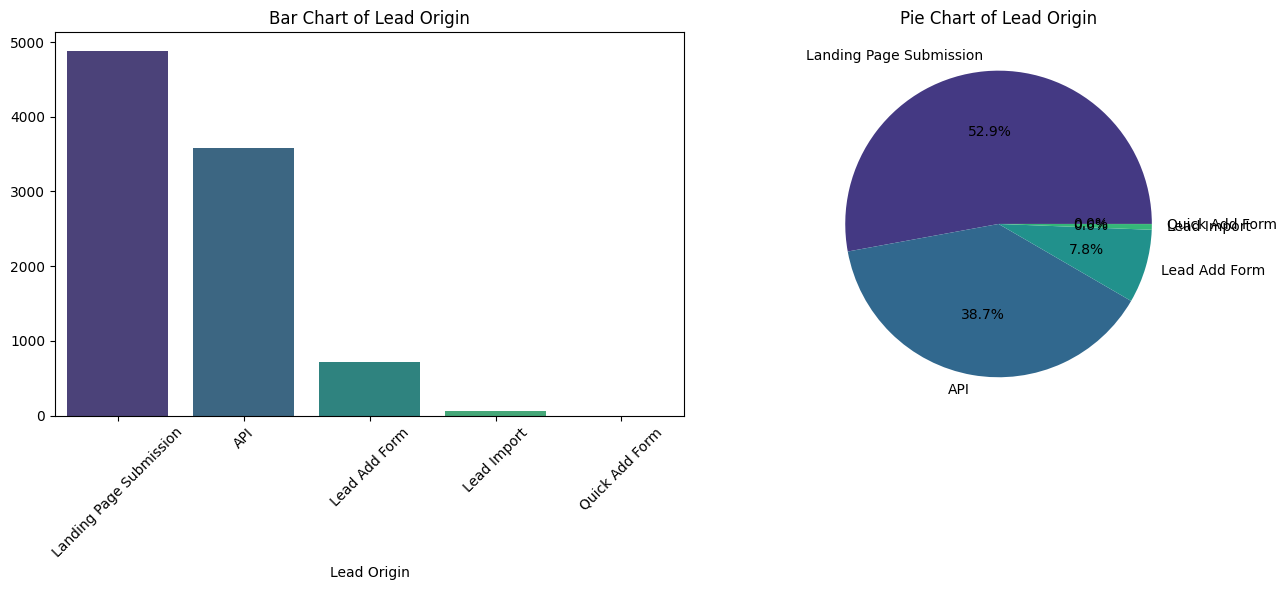

In [112]:
plot_categorical_distributions('Lead Origin')

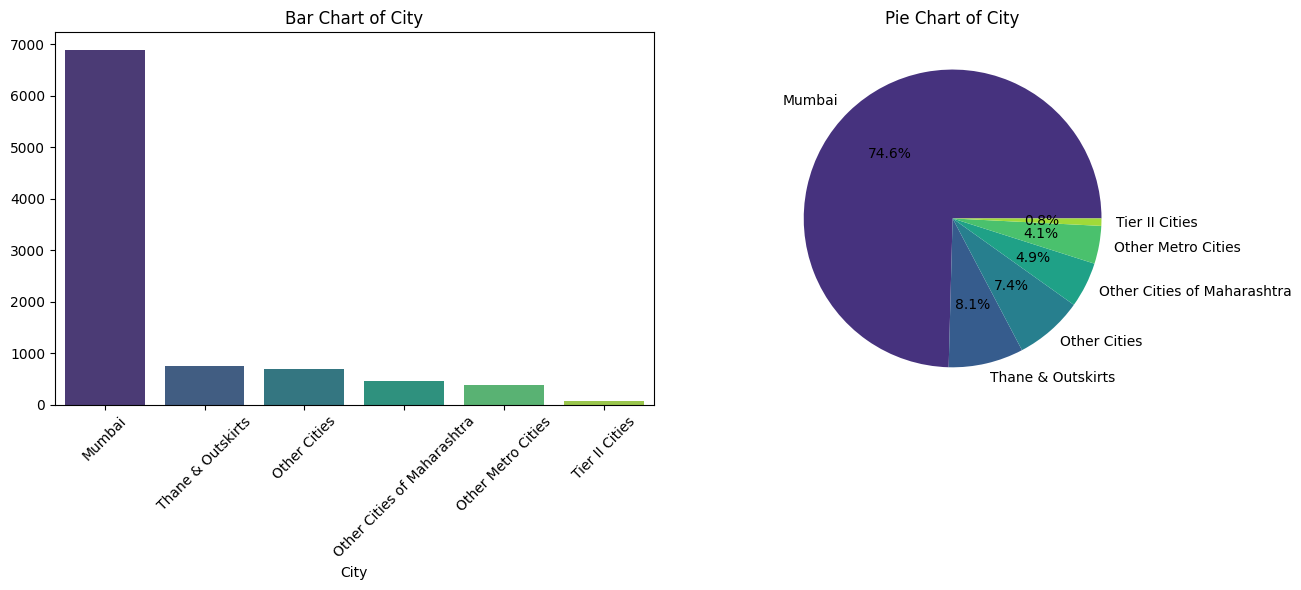

In [113]:
plot_categorical_distributions('City')

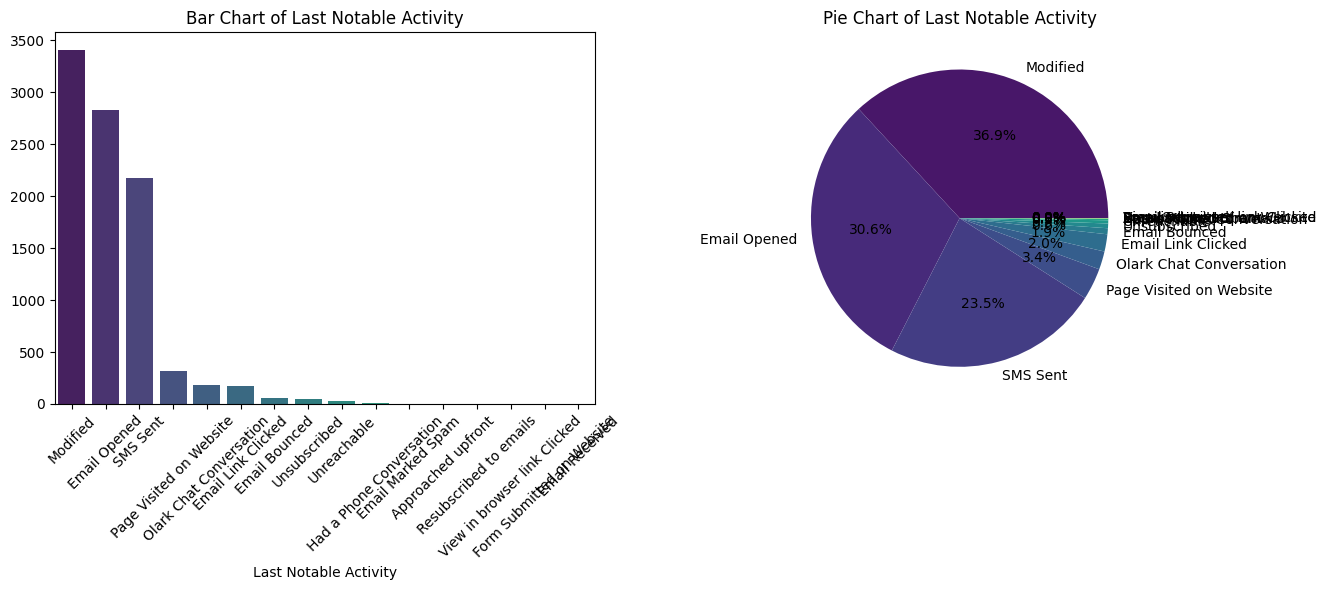

In [114]:
plot_categorical_distributions('Last Notable Activity')

In [115]:
cat_yes_no = ['A free copy of Mastering The Interview', 'I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 'Through Recommendations', 'Digital Advertisement', 'Newspaper', 'X Education Forums', 'Newspaper Article', 'Magazine', 'Search']
cat_yes_no

['A free copy of Mastering The Interview',
 'I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Through Recommendations',
 'Digital Advertisement',
 'Newspaper',
 'X Education Forums',
 'Newspaper Article',
 'Magazine',
 'Search']

In [118]:
def plot_pie_charts(columns):
    num_columns = len(columns)
    num_cols = 4  # Number of columns in subplot grid
    num_rows = (num_columns + num_cols - 1) // num_cols  # Calculate number of rows needed

    plt.figure(figsize=(18, num_rows * 6))

    for i, column in enumerate(columns):
        plt.subplot(num_rows, num_cols, i + 1)
        value_counts = lead[column].value_counts()
        plt.pie(
            value_counts,
            labels=value_counts.index,
            autopct='%1.1f%%',
            colors=sns.color_palette('coolwarm', len(value_counts))
        )
        plt.title(f'Pie Chart of {column}')

    plt.tight_layout()
    plt.show()

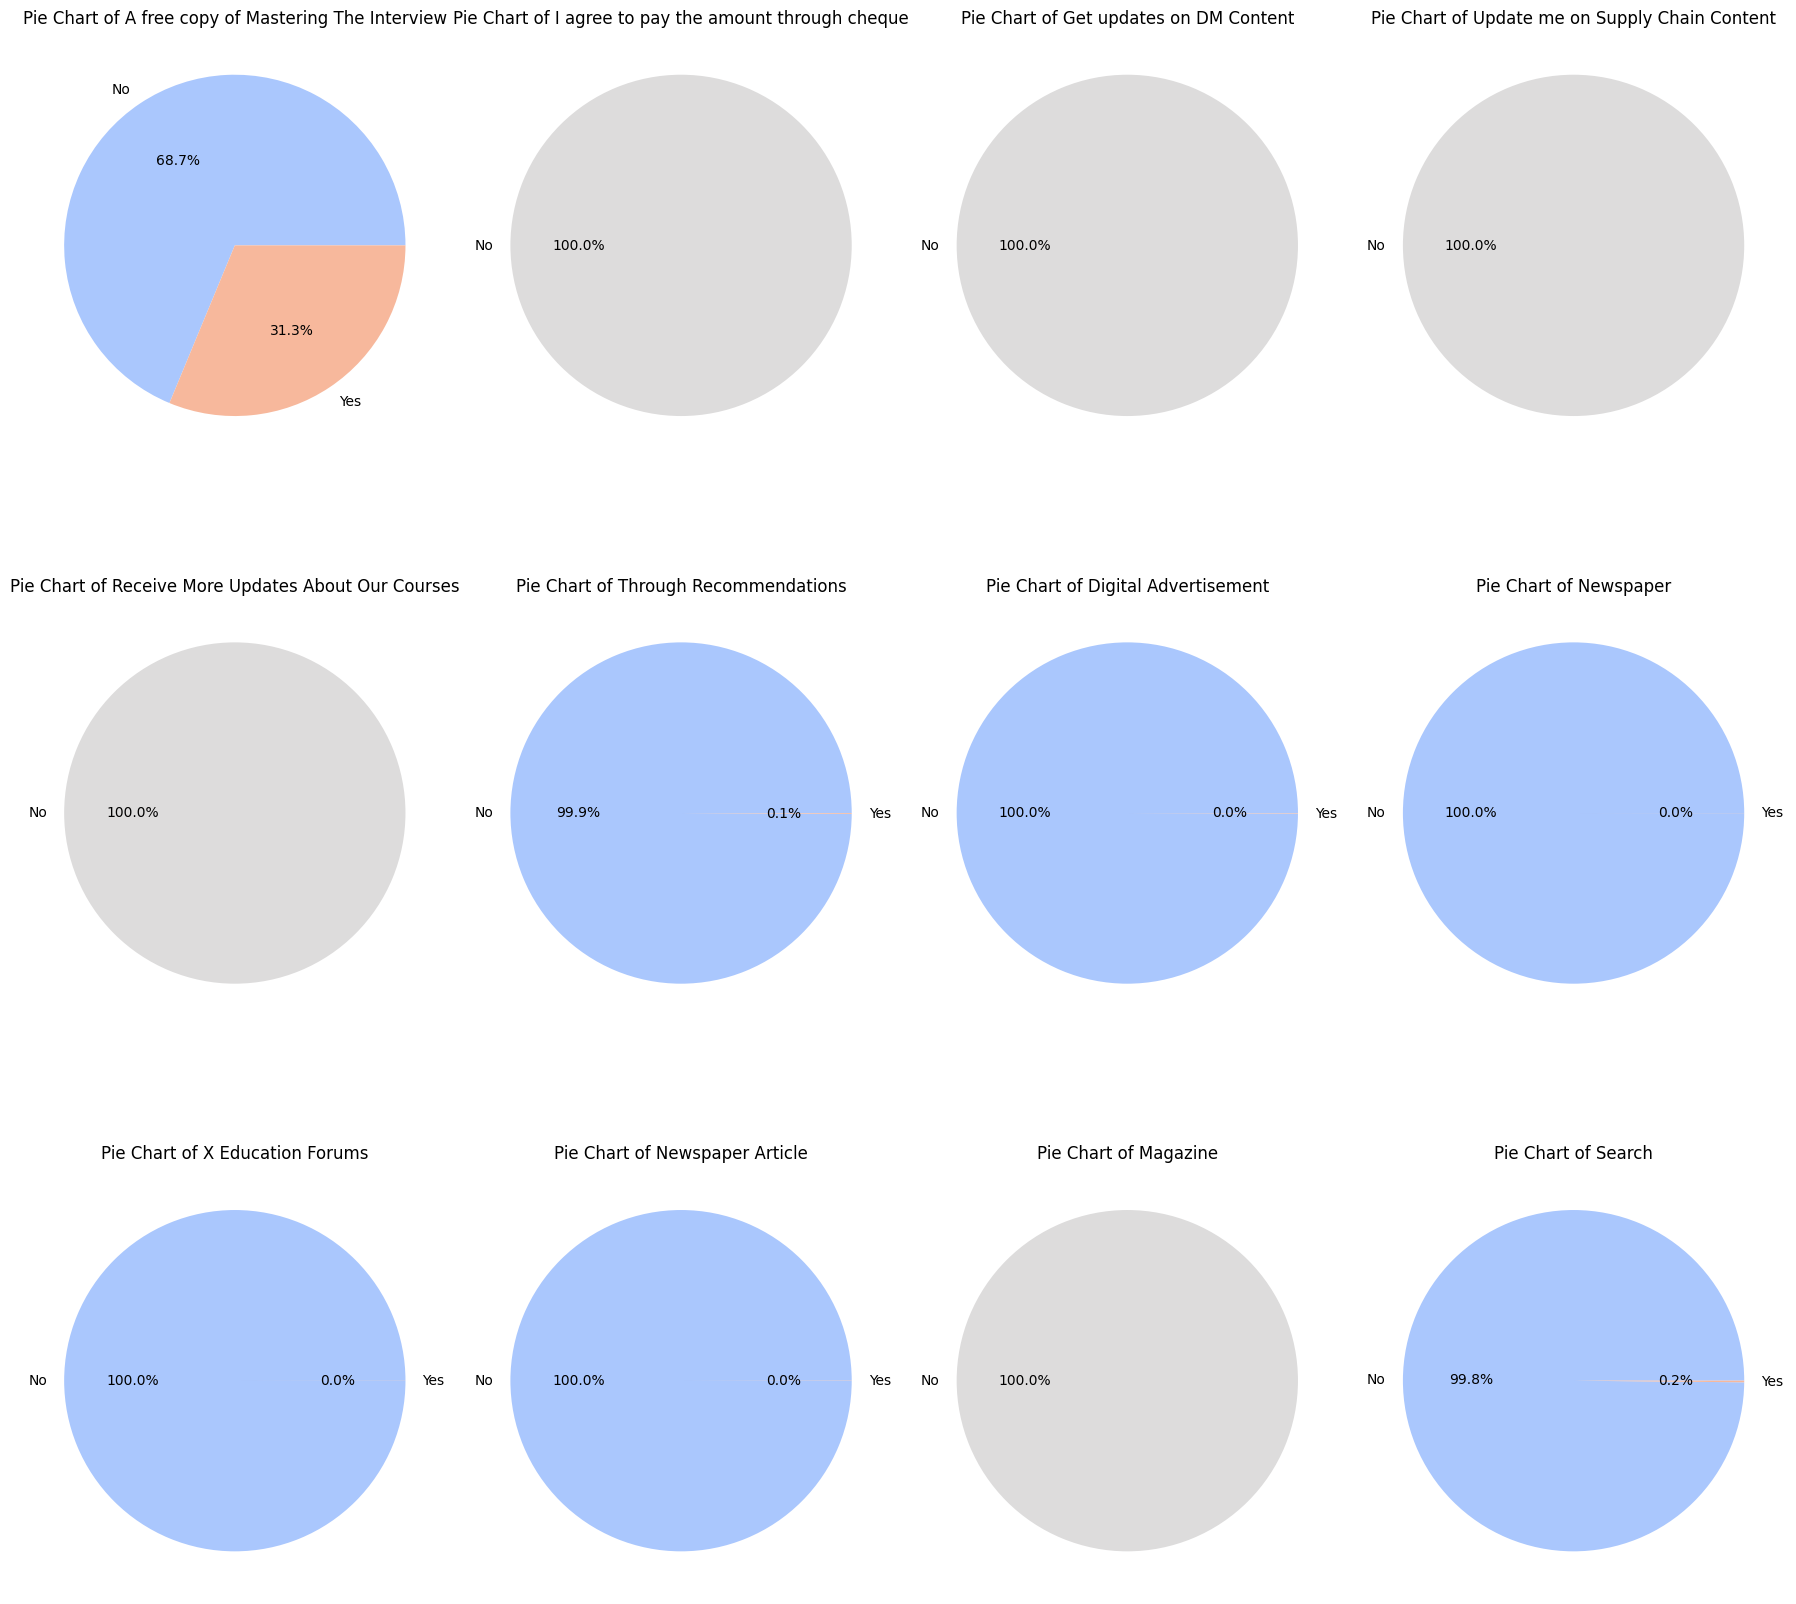

In [119]:
plot_pie_charts(cat_yes_no)

In [120]:
def plot_bar_charts(columns):
    num_columns = len(columns)
    num_cols = 4  # Number of columns in subplot grid
    num_rows = (num_columns + num_cols - 1) // num_cols  # Calculate number of rows needed

    plt.figure(figsize=(18, num_rows * 6))

    for i, column in enumerate(columns):
        plt.subplot(num_rows, num_cols, i + 1)
        value_counts = lead[column].value_counts()
        sns.barplot(
            x=value_counts.index, 
            y=value_counts.values, 
            palette='coolwarm'
        )
        plt.title(f'Bar Chart of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

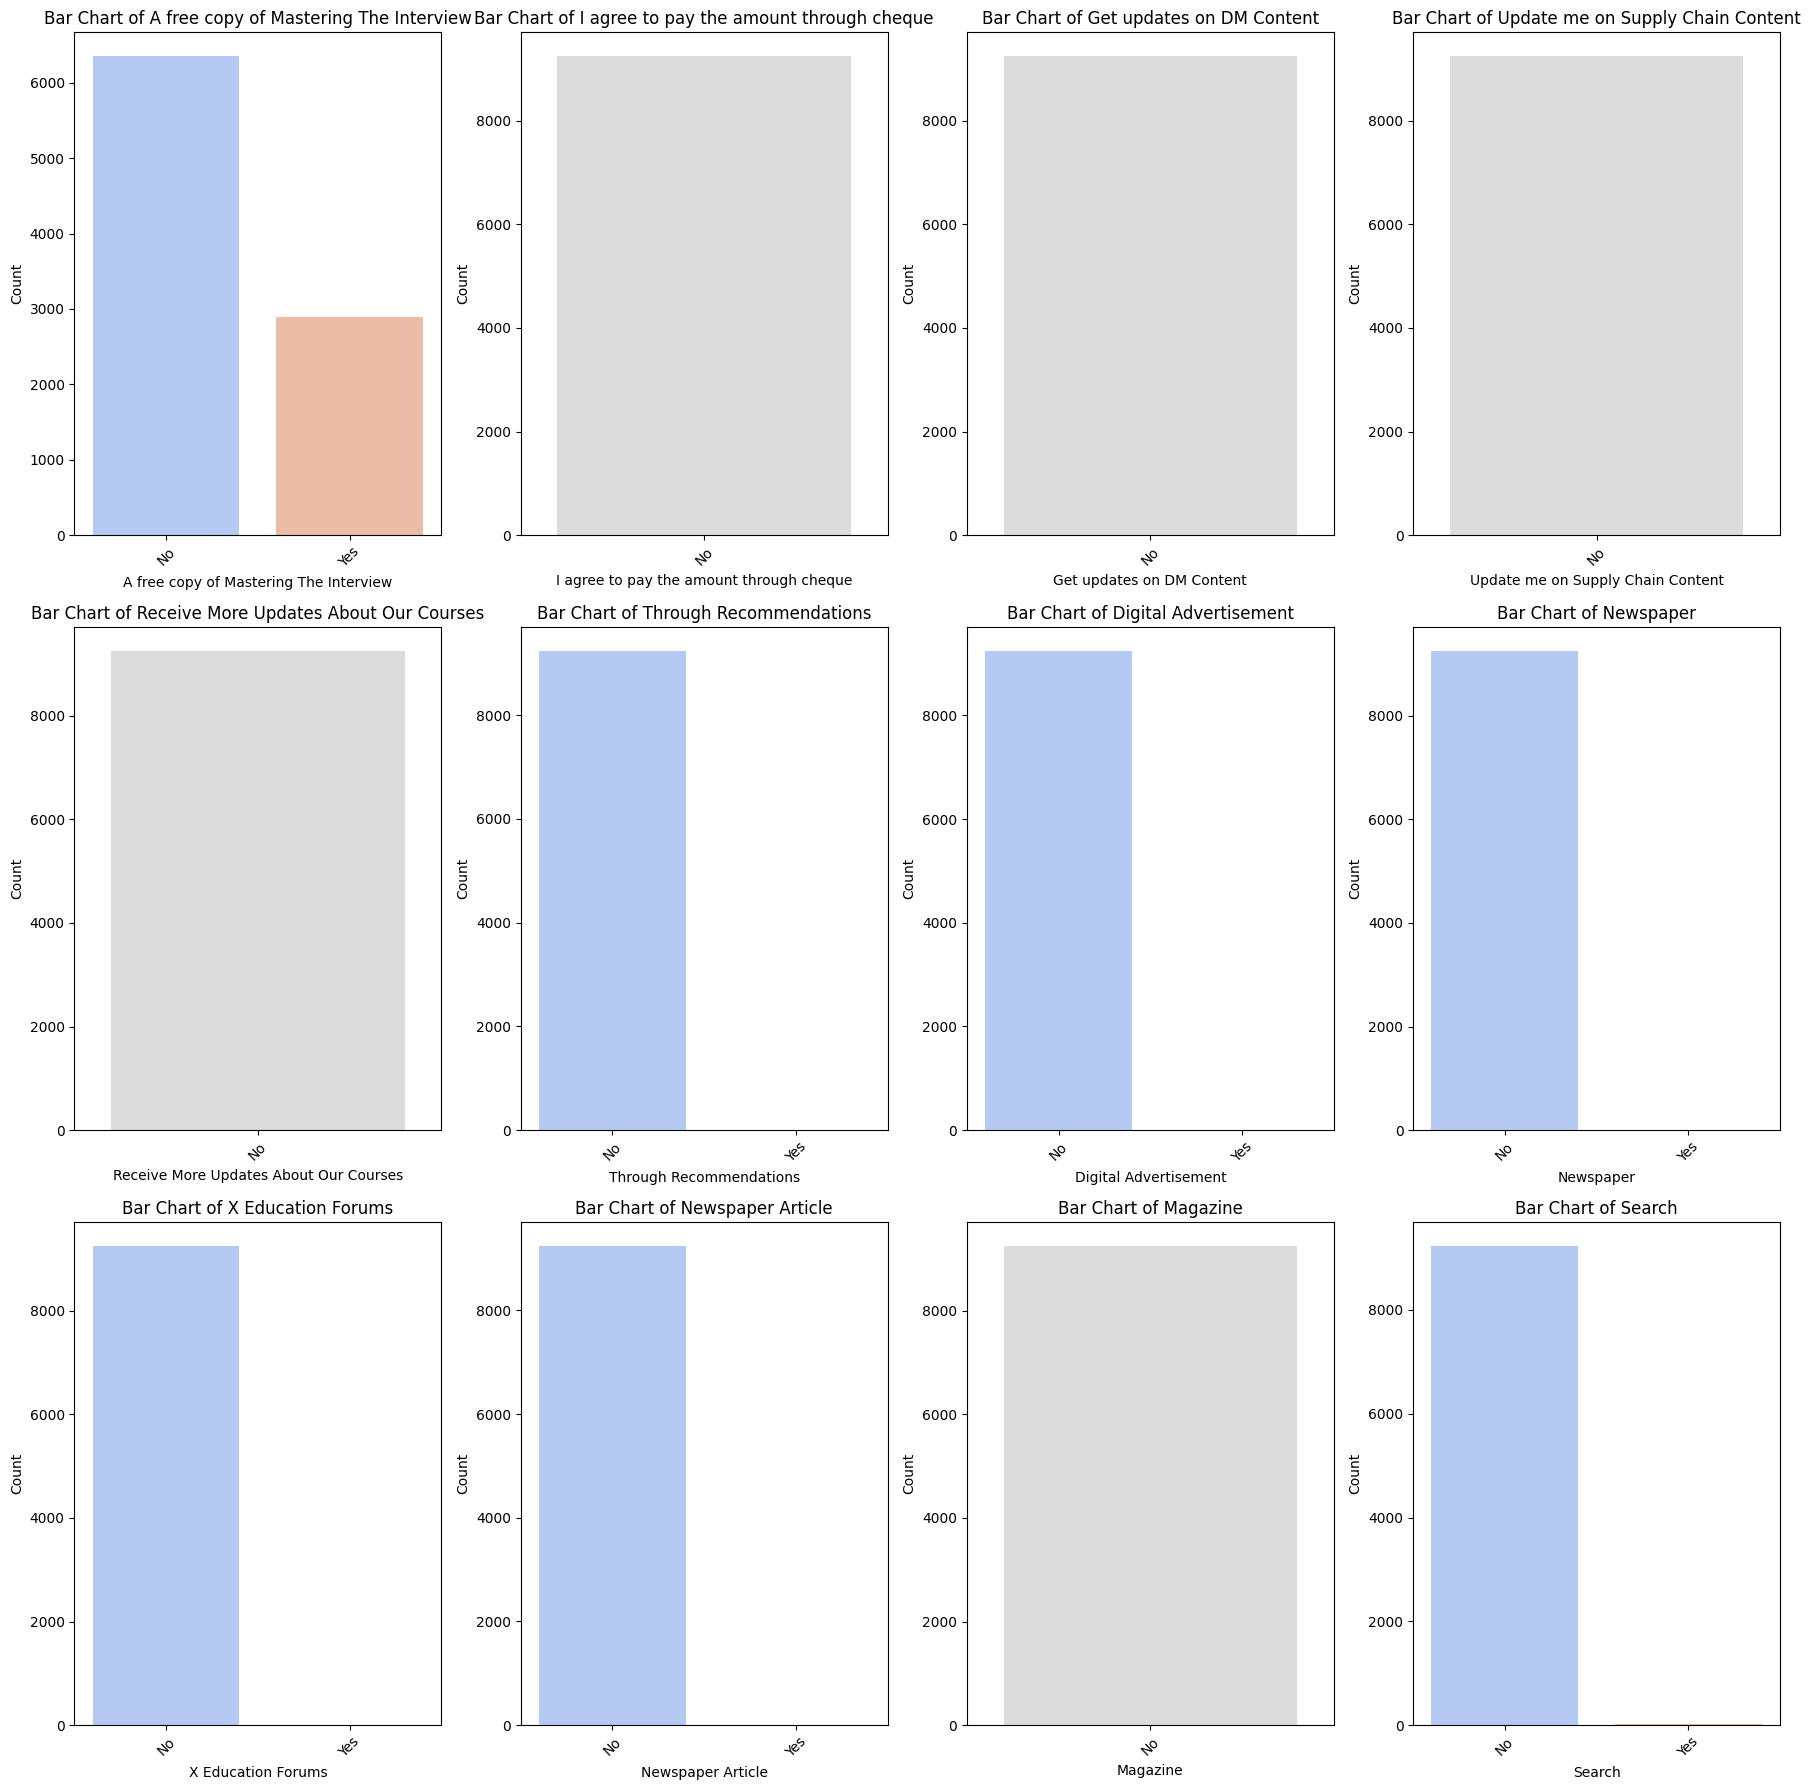

In [121]:
plot_bar_charts(cat_yes_no)

### INSIGHTS
- With respect to Categorical values i found some of the deatils and insights :

    - Data Distribution
    - Common Categories
    - Comparison Between Categories
    - Percentage Representation
    - Insights from Visualizations
    
- Work Done :

    - Imputed and Deleted Null value Features and rows as per our need.
    - Extracted Insights from the categorical values.
    
- Main Insights :

    - The customers are basically from India (Mumbai), who are mostly unemployed and are hungry for jobs 
       or are job seekers. They are most interested in this facility. On the other hand, their specialization 
       may not be in the field we are providing, so they are mostly interested in switching their field.
       
    - Mostly the customers fill data through online websites like GOOGLE and they are mostly connected 
       by the Email and more and are mostly interesed in the course and wants to know the leads.
    

In [129]:
df_lead.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0


In [130]:
print(df_lead['Converted'].value_counts())
print()
print(round(df_lead['Converted'].value_counts(normalize=True),2) * 100)

Converted
0    5679
1    3561
Name: count, dtype: int64

Converted
0    61.0
1    39.0
Name: proportion, dtype: float64


So 60% Customers are agreed and 40% are not the ratio is most to give about the dataand well the customers are satisfid.
    
As already clarified by the Categorical we can go with the numeric features also.

In [131]:
def numeric_plot(continuous_col) :
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_lead, x='Converted', y=continuous_col, palette='viridis')
    plt.title(f'Box Plot of {continuous_col} by Converted')
    plt.xlabel('Converted')
    plt.ylabel(continuous_col)
    
    g = sns.FacetGrid(df_lead, col='Converted', col_wrap=4, height=4, aspect=1.5)
    g.map(sns.histplot, continuous_col, kde=True, color='blue')
    g.set_axis_labels(continuous_col, 'Count')
    g.set_titles(col_template='{col_name}')
    plt.show()

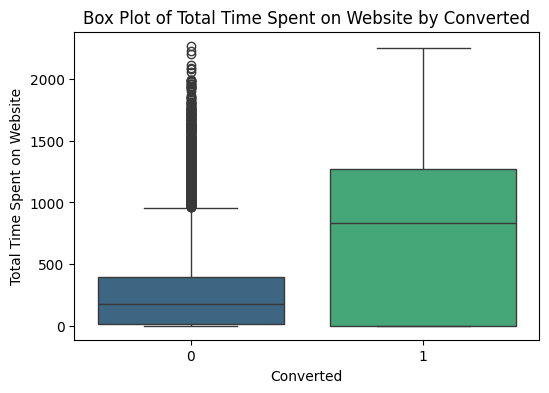

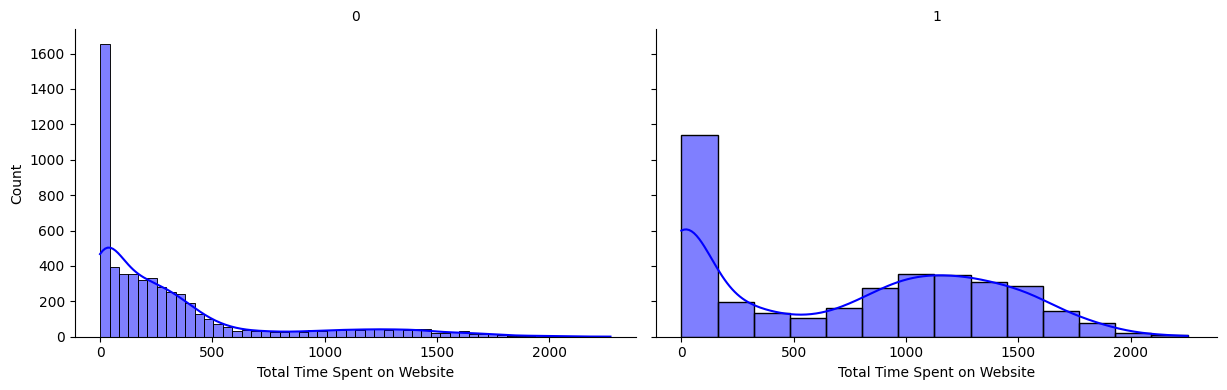

In [132]:
numeric_plot('Total Time Spent on Website')

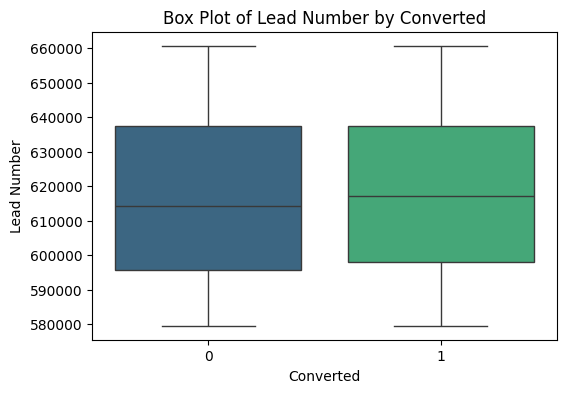

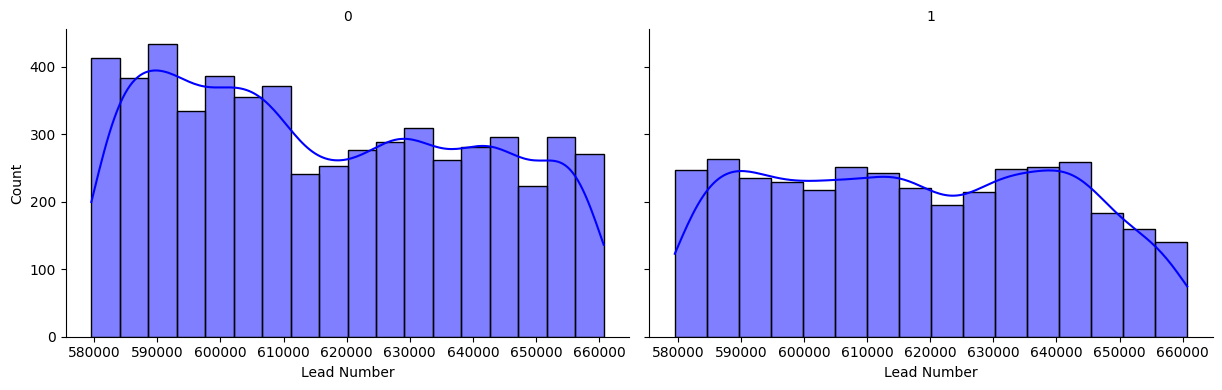

In [134]:
numeric_plot('Lead Number')

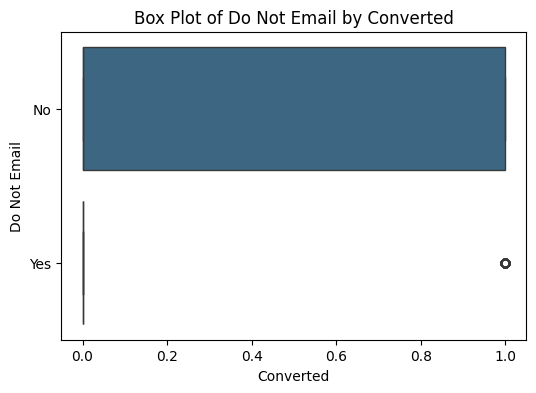

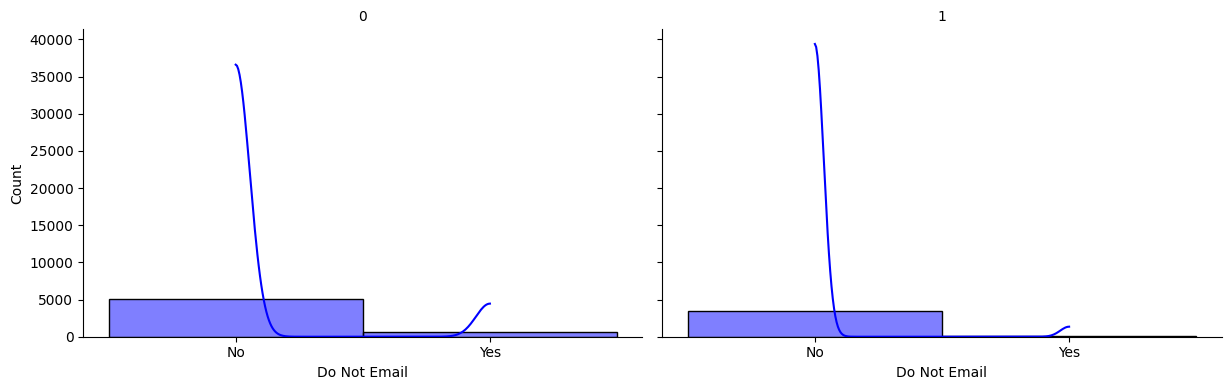

In [135]:
numeric_plot('Do Not Email')

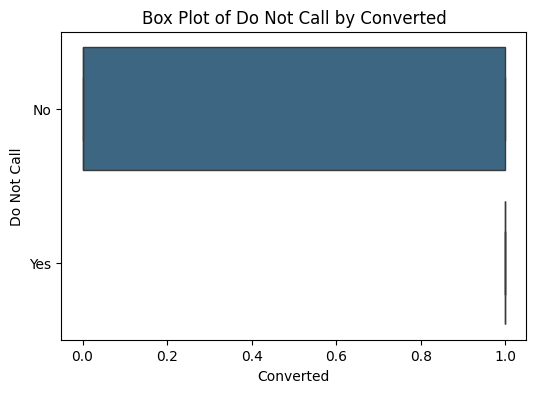

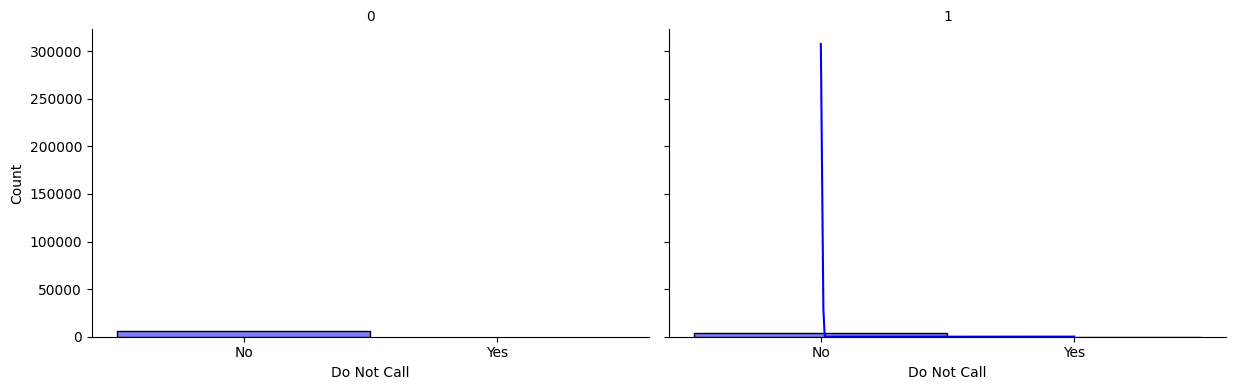

In [136]:
numeric_plot('Do Not Call')

INSIGHTS
    
As in numerical column we got that the customers visits the page are most likely interestd for purchasing the cource,

<Figure size 1000x1000 with 0 Axes>

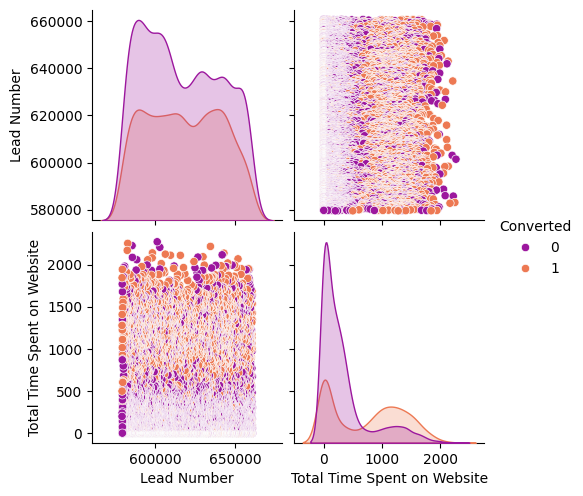

In [137]:
plt.figure(figsize = [10, 10])
sns.pairplot(df_lead, hue = 'Converted', palette = 'plasma')
plt.show()

##### Data Preprocessing

Now we have to do Preprocessing where we have to understand and keep the reqired features and on the other hand 

we have to to do feature selection also :

Works to do :

    - Feature Understanding and Selection 
    - Feature Selection which is relevent to our target variable or have some dependendencies.
    - Have to Create Dummy variable so that machine can read the data set  
            --  As we know ML requires the dataset in Numbers
    - Concactinating the the actual features with dummy variable.
    - Have to spilt for model preparation.

In [138]:
df_lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [140]:
for col in df_lead.columns :
    if df_lead[col].dtype == object:
        print(df_lead[col].value_counts())
        print(50*'_')
        print()

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
__________________________________________________

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
__________________________________________________

Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites  

In [144]:
print(round(df_lead['Specialization'].value_counts(normalize = True),2) * 100)
print(50*'_')
print()
print(round(df_lead['What is your current occupation'].value_counts(normalize = True),2) * 100)
print(50*'_')
print()
print(round(df_lead['Last Activity'].value_counts(normalize = True),2) * 100)
print(50*'_')
print()
print(round(df_lead['Lead Source'].value_counts(normalize = True),2) * 100)
print(50*'_')
print()
print(round(df_lead['Lead Origin'].value_counts(normalize = True),2) * 100)
print(50*'_')
print()

Specialization
Others                               37.0
Finance Management                   11.0
Human Resource Management             9.0
Marketing Management                  9.0
Operations Management                 5.0
Business Administration               4.0
IT Projects Management                4.0
Supply Chain Management               4.0
Banking, Investment And Insurance     4.0
Travel and Tourism                    2.0
Media and Advertising                 2.0
International Business                2.0
Healthcare Management                 2.0
Hospitality Management                1.0
E-COMMERCE                            1.0
Retail Management                     1.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   0.0
Name: proportion, dtype: float64
__________________________________________________

What is your current occupation
Unemployed              90.0
Working Professional     8.0
Student     

And this files are useful so am not removing it as they are related to the conversion of lead.

In [146]:
print(round(df_lead['Page Views Per Visit'].value_counts(normalize = True),2) * 100)
print(50*'_')
print()
print(round(df_lead['TotalVisits'].value_counts(normalize = True),2) * 100)
print(50*'_')
print()
print(round(df_lead['Prospect ID'].value_counts(normalize = True),2) * 100)
print(50*'_')
print()

Page Views Per Visit
0.00    24.0
2.00    19.0
3.00    13.0
4.00    10.0
1.00     7.0
        ... 
2.56     0.0
6.33     0.0
1.64     0.0
8.21     0.0
2.08     0.0
Name: proportion, Length: 115, dtype: float64
__________________________________________________

TotalVisits
0.0      24.0
2.0      18.0
3.0      14.0
4.0      12.0
5.0       8.0
6.0       5.0
1.0       4.0
7.0       3.0
8.0       2.0
9.0       2.0
0.0       1.0
10.0      1.0
11.0      1.0
13.0      1.0
12.0      0.0
14.0      0.0
16.0      0.0
15.0      0.0
17.0      0.0
18.0      0.0
20.0      0.0
19.0      0.0
21.0      0.0
23.0      0.0
24.0      0.0
25.0      0.0
27.0      0.0
22.0      0.0
29.0      0.0
28.0      0.0
26.0      0.0
141.0     0.0
55.0      0.0
30.0      0.0
43.0      0.0
74.0      0.0
41.0      0.0
54.0      0.0
115.0     0.0
251.0     0.0
32.0      0.0
42.0      0.0
Name: proportion, dtype: float64
__________________________________________________

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0

AS Prospect ID are not so much relatable for our model so dropping them also for better predection.

In [147]:
df_lead.drop('Prospect ID', inplace = True, axis = 1)

In [148]:
print(round(df_lead['Tags'].value_counts(normalize = True),2) * 100)

Tags
Will revert after reading the email                  59.0
Ringing                                              13.0
Interested in other courses                           6.0
Already a student                                     5.0
Closed by Horizzon                                    4.0
switched off                                          3.0
Busy                                                  2.0
Lost to EINS                                          2.0
Not doing further education                           2.0
Interested  in full time MBA                          1.0
Graduation in progress                                1.0
invalid number                                        1.0
Diploma holder (Not Eligible)                         1.0
wrong number given                                    1.0
opp hangup                                            0.0
number not provided                                   0.0
in touch with EINS                                    0.0
Lost to O

`Tags` can be much important for us.

In [152]:
print(round(df_lead['Search'].value_counts(normalize = True),2) * 100)  ,print(50*'_'),print()
print(round(df_lead['Magazine'].value_counts(normalize = True),2) * 100) ,print(50*'_'),print()
print(round(df_lead['Newspaper Article'].value_counts(normalize = True),2) * 100) ,print(50*'_'),print()
print(round(df_lead['X Education Forums'].value_counts(normalize = True),2) * 100) ,print(50*'_'),print()
print(round(df_lead['Newspaper'].value_counts(normalize = True),2) * 100) ,print(50*'_'),print()
print(round(df_lead['Digital Advertisement'].value_counts(normalize = True),2) * 100) ,print(50*'_'),print()
print(round(df_lead['Through Recommendations'].value_counts(normalize = True),2) * 100), print(50*'_'),print()
print(round(df_lead['Receive More Updates About Our Courses'].value_counts(normalize = True),2) * 100) ,print(50*'_'),print()
print(round(df_lead['Update me on Supply Chain Content'].value_counts(normalize = True),2) * 100) ,print(50*'_'),print()
print(round(df_lead['Get updates on DM Content'].value_counts(normalize = True),2) * 100) ,print(50*'_'),print()

Search
No     100.0
Yes      0.0
Name: proportion, dtype: float64
__________________________________________________

Magazine
No    100.0
Name: proportion, dtype: float64
__________________________________________________

Newspaper Article
No     100.0
Yes      0.0
Name: proportion, dtype: float64
__________________________________________________

X Education Forums
No     100.0
Yes      0.0
Name: proportion, dtype: float64
__________________________________________________

Newspaper
No     100.0
Yes      0.0
Name: proportion, dtype: float64
__________________________________________________

Digital Advertisement
No     100.0
Yes      0.0
Name: proportion, dtype: float64
__________________________________________________

Through Recommendations
No     100.0
Yes      0.0
Name: proportion, dtype: float64
__________________________________________________

Receive More Updates About Our Courses
No    100.0
Name: proportion, dtype: float64
____________________________________________

(None, None, None)

As this columns or features :

`['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
'Get updates on DM Content']`
        
are also some features which are classified in binary dataset and are mostly imbalanced or one of the value isn't given so am removing this too.    

In [153]:
imbalance = ['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content']
df_lead.drop(imbalance, axis = 1, inplace = True)

In [155]:
print(round(df_lead['City'].value_counts(normalize = True),2) * 100)
print(50*'_')
print()
print(round(df_lead['Country'].value_counts(normalize = True),2) * 100)

City
Mumbai                         75.0
Thane & Outskirts               8.0
Other Cities                    7.0
Other Cities of Maharashtra     5.0
Other Metro Cities              4.0
Tier II Cities                  1.0
Name: proportion, dtype: float64
__________________________________________________

Country
India                   97.0
United States            1.0
United Arab Emirates     1.0
Singapore                0.0
Saudi Arabia             0.0
United Kingdom           0.0
Australia                0.0
Qatar                    0.0
Hong Kong                0.0
Bahrain                  0.0
Oman                     0.0
France                   0.0
unknown                  0.0
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy              

In country more than data is of India so the column isn't useful at all or can say that imbalanced data is given.

In [156]:
df_lead.drop('Country', axis = 1, inplace = True)

In [157]:
print(round(df_lead['I agree to pay the amount through cheque'].value_counts(normalize = True),2) * 100)

I agree to pay the amount through cheque
No    100.0
Name: proportion, dtype: float64


Now the column  `['I agree to pay the amount through cheque']` a are in binary form and are not so considered with the target they releted to finance so just removing this also, and last for Last Notable Activity.

In [158]:
df_lead.drop('I agree to pay the amount through cheque', axis = 1, inplace = True)

In [159]:
round(df_lead['Last Notable Activity'].value_counts(normalize = True),2) * 100

Last Notable Activity
Modified                        37.0
Email Opened                    31.0
SMS Sent                        24.0
Page Visited on Website          3.0
Olark Chat Conversation          2.0
Email Link Clicked               2.0
Email Bounced                    1.0
Unsubscribed                     1.0
Unreachable                      0.0
Had a Phone Conversation         0.0
Email Marked Spam                0.0
Approached upfront               0.0
Resubscribed to emails           0.0
View in browser link Clicked     0.0
Form Submitted on Website        0.0
Email Received                   0.0
Name: proportion, dtype: float64

This column is be useful with the target column.

In [160]:
df_lead['Lead Number'].value_counts()

Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64

In [161]:
df_lead.drop('Lead Number', axis = 1, inplace = True)

Lead Number is working as the row no so removing this too...

##### Preprocessing.

In [162]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [163]:
df_lead.dtypes

Lead Origin                               object
Lead Source                               object
Do Not Email                              object
Do Not Call                               object
Converted                                  int64
TotalVisits                               object
Total Time Spent on Website                int64
Page Views Per Visit                      object
Last Activity                             object
Specialization                            object
What is your current occupation           object
Tags                                      object
City                                      object
A free copy of Mastering The Interview    object
Last Notable Activity                     object
dtype: object

In [164]:
df_dumm = pd.get_dummies(df_lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','TotalVisits', 
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True, dtype=int)

In [165]:
df_lead.drop(df_lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','TotalVisits', 
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], axis = 1, inplace = True)

In [167]:
df_lead = pd.concat([df_dumm, df_lead], axis = 1)

In [168]:
df_lead.dtypes

Lead Origin_Landing Page Submission                   int32
Lead Origin_Lead Add Form                             int32
Lead Origin_Lead Import                               int32
Lead Origin_Quick Add Form                            int32
Lead Source_Direct Traffic                            int32
                                                      ...  
Last Notable Activity_Unreachable                     int32
Last Notable Activity_Unsubscribed                    int32
Last Notable Activity_View in browser link Clicked    int32
Converted                                             int64
Total Time Spent on Website                           int64
Length: 268, dtype: object

In [169]:
df_lead.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat',
       ...
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked', 'Converted',
       'Total Time Spent on Website'],
      dtype='object', length=268)

In [171]:
# Trasnforming Dependent and independent values.
x = df_lead.drop(columns = 'Converted')
y = df_lead['Converted']

In [172]:
# spliting the train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

In [173]:
# create and fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [174]:
# make predictions on the train data
y_train_pred = model.predict(x_train)

In [183]:
# evaluate the model
print("Value of accuracy_score : ", accuracy_score(y_train, y_train_pred))
print()
print("Value of confusion_matrix : \n", confusion_matrix(y_train, y_train_pred))
print()
print("Value of classification_report : \n", classification_report(y_train, y_train_pred))

Value of accuracy_score :  0.8906926406926406

Value of confusion_matrix : 
 [[4199  321]
 [ 487 2385]]

Value of classification_report : 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      4520
           1       0.88      0.83      0.86      2872

    accuracy                           0.89      7392
   macro avg       0.89      0.88      0.88      7392
weighted avg       0.89      0.89      0.89      7392



In [184]:
# make prediction on test data
y_test_pred = model.predict(x_test)

In [187]:
# evaluate the model 
print("Value of accuracy_score : ", accuracy_score(y_test, y_test_pred))
print()
print("Value of confusion_matrix : \n", confusion_matrix(y_test, y_test_pred))
print()
print("Value of classification_report : \n", classification_report(y_test, y_test_pred))

Value of accuracy_score :  0.8869047619047619

Value of confusion_matrix : 
 [[1070   89]
 [ 120  569]]

Value of classification_report : 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1159
           1       0.86      0.83      0.84       689

    accuracy                           0.89      1848
   macro avg       0.88      0.87      0.88      1848
weighted avg       0.89      0.89      0.89      1848

